# I. Imports, modules, configurations

## I.1 Configs

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from datetime import datetime
from time import *
from math import sin, cos, sqrt, atan2, radians


sys.path.insert(0, "/home/apprenant/Documents/simplon_dev/pyhon_sql/taxi_nyc")

# Pandas configurations 
sns.set()
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## I.2 Dataset import

In [ ]:
# Reading the tsv files, printing the shape to see its dimensions and display the first five rows
"""
    The original dataset contains more than 1,4 milions rows.
    The source dataset : https://www.kaggle.com/c/nyc-taxi-trip-duration/data?select=train.zip
    For this analysis, we created a dataset sample from the original csv file. Sample of 100k rows
    Code:
    # The sample method randomly choose rows from a dataframe.  
    df = df.sample(100000)
"""
df = pd.read_csv('../Data/raw_data/train.csv')

# II. Data Exploration

## II.1 Dataset properties

In [32]:
df.sample(100000)
print('There are {:,} rows and {} columns in our dataset'.format(df.shape[0], df.shape[1]))

There are 100,000 rows and 14 columns in our dataset


In [33]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,vitesse_moyenne,weekday
404427,id1078247,2,2016-01-01 00:01:37,2016-01-01 00:03:31,1,-73.973335,40.764072,-73.974854,40.761734,N,114,0.290,9.157895,Friday
276262,id3956309,1,2016-01-01 00:05:35,2016-01-01 00:17:43,1,-73.990135,40.748852,-73.956535,40.775665,N,728,4.111,20.329121,Friday
1084575,id3900441,2,2016-01-01 00:06:04,2016-01-01 00:15:52,1,-73.969566,40.788765,-73.957085,40.770683,N,588,2.269,13.891837,Friday
388273,id3512166,2,2016-01-01 00:09:01,2016-01-01 00:19:32,2,-73.980484,40.783463,-73.953323,40.776718,N,631,2.407,13.732488,Friday
1034984,id0441132,2,2016-01-01 00:10:25,2016-01-01 00:16:30,1,-74.006500,40.739677,-74.006874,40.744091,N,365,0.492,4.852603,Friday


<AxesSubplot:title={'center':'Data types repartition'}, ylabel='None'>

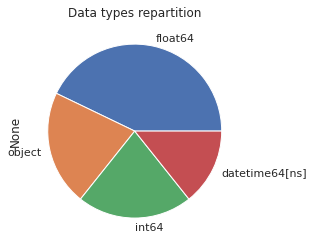

In [38]:
# Just as informations about our data types
sns.set_theme(style="whitegrid")
plt.title('Data types repartition')
df.dtypes.value_counts().plot.pie()

## II.2 Dataset colmuns analysis

In [36]:
# We print all our columns
print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'vitesse_moyenne', 'weekday'],
      dtype='object')


In [37]:
# We analyse the missing datas
df.isnull().sum().sort_values()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
vitesse_moyenne       0
weekday               0
dtype: int64

# III. Data indicators

## INDICATOR 1 : la vitesse moyenne de chaque trajet (en km/h)

In [40]:
def vitesse_trajet(distance, temps ):     
    """Retourne la vitesse entre les le début et la fin du trajet."""     
    res = (distance * 1000)/ temps     
    kmh = res * 3.6      
    return kmh
df['vitesse_moyenne'] = vitesse_trajet(df.distance, df.trip_duration)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,vitesse_moyenne,weekday
404427,id1078247,2,2016-01-01 00:01:37,2016-01-01 00:03:31,1,-73.973335,40.764072,-73.974854,40.761734,N,114,0.290,9.157895,Friday
276262,id3956309,1,2016-01-01 00:05:35,2016-01-01 00:17:43,1,-73.990135,40.748852,-73.956535,40.775665,N,728,4.111,20.329121,Friday
1084575,id3900441,2,2016-01-01 00:06:04,2016-01-01 00:15:52,1,-73.969566,40.788765,-73.957085,40.770683,N,588,2.269,13.891837,Friday
388273,id3512166,2,2016-01-01 00:09:01,2016-01-01 00:19:32,2,-73.980484,40.783463,-73.953323,40.776718,N,631,2.407,13.732488,Friday
1034984,id0441132,2,2016-01-01 00:10:25,2016-01-01 00:16:30,1,-74.006500,40.739677,-74.006874,40.744091,N,365,0.492,4.852603,Friday


## INDICATOR 2 : le nombre de trajets effectués en fonction du jour de la semaine

In [41]:
# Pour avoir le nom du jour, plutot qu'un numéro
df['weekday'] = df.pickup_datetime.dt.day_name()
df['weekday'].value_counts()

Friday       15368
Saturday     15156
Thursday     14973
Wednesday    14280
Tuesday      13687
Sunday       13607
Monday       12929
Name: weekday, dtype: int64

## INDICATOR 3 : le nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h.

In [42]:
df.groupby(pd.Grouper(key='pickup_datetime',freq='4H'))['id'].count()

pickup_datetime
2016-01-01 00:00:00    130
2016-01-01 04:00:00     47
2016-01-01 08:00:00     43
2016-01-01 12:00:00     95
2016-01-01 16:00:00     87
                      ... 
2016-06-30 04:00:00     52
2016-06-30 08:00:00    106
2016-06-30 12:00:00    100
2016-06-30 16:00:00    116
2016-06-30 20:00:00    121
Freq: 4H, Name: id, Length: 1092, dtype: int64

## INDICATOR 4 : le nombre de km parcourus par jour de la semaine

In [43]:
#Nombre de km par jour de la semaine
df.groupby('weekday')['distance'].sum()

weekday
Friday       52075.375
Monday       45697.318
Saturday     50778.532
Sunday       50525.934
Thursday     52191.054
Tuesday      45145.475
Wednesday    46762.002
Name: distance, dtype: float64